# Run the whole deltas algorithm

In [1]:
%load_ext autoreload
%autoreload 2

import ipywidgets
from deltas.pipeline import data, classifier, evaluation
from deltas.model import base, downsample
import deltas.plotting.plots as plots

## Get data

In [2]:
N1 = 1000
N2 = 10
m = 5
# Gaussian (not always seperable)
data_clf = data.get_data(
    m1=[-m, -m],
    m2=[m, m],
    cov1=[[1, 0], [0, 1]],
    cov2=[[1, 0], [0, 1]],
    N1=N1,
    N2=N2,
    scale=False
    )

## Get Classifier

Baseline


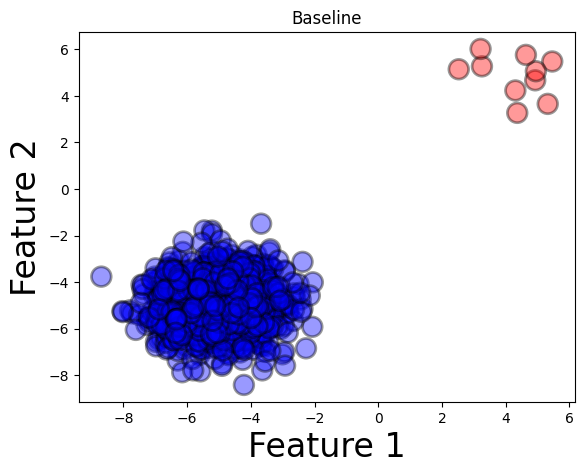

Baseline


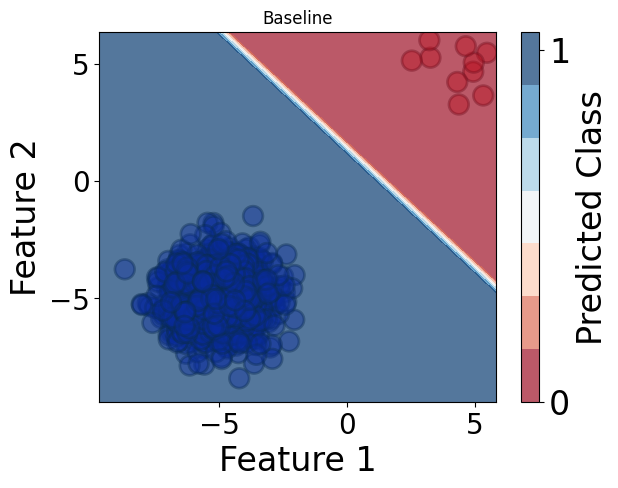

SMOTE


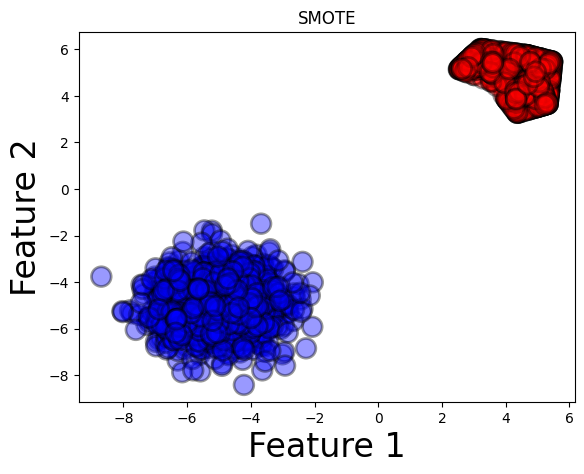

SMOTE


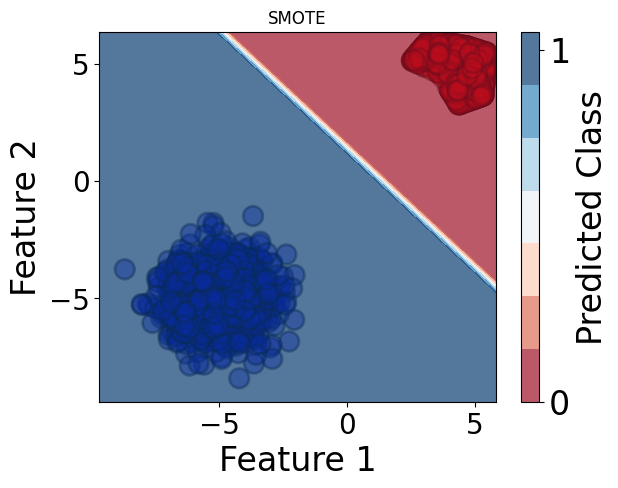

Balanced Weights


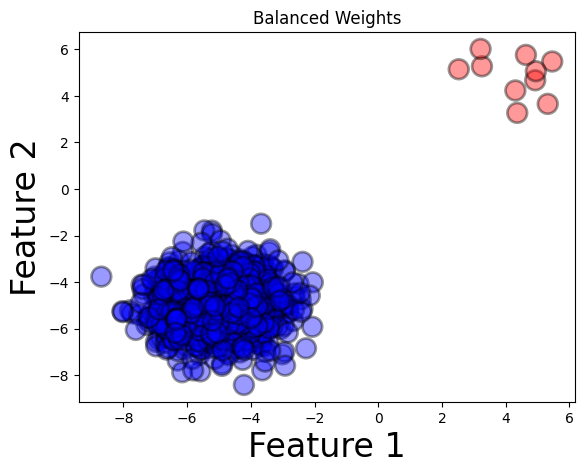

Balanced Weights


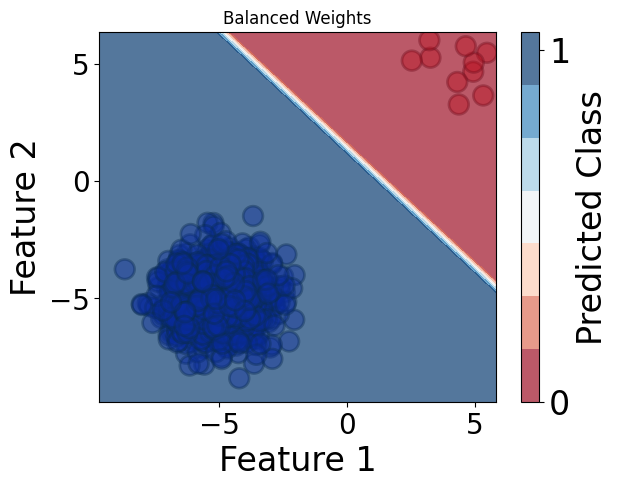

BMR


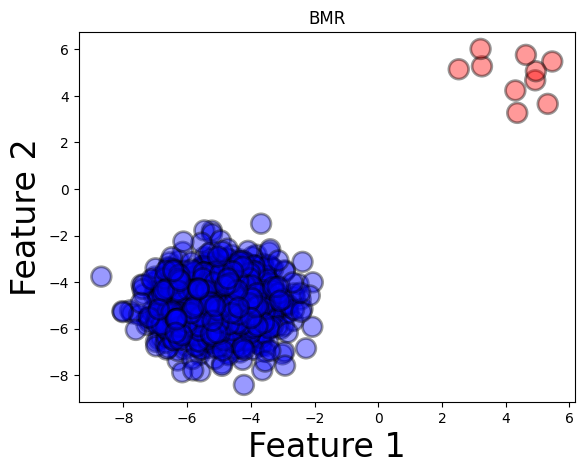

BMR


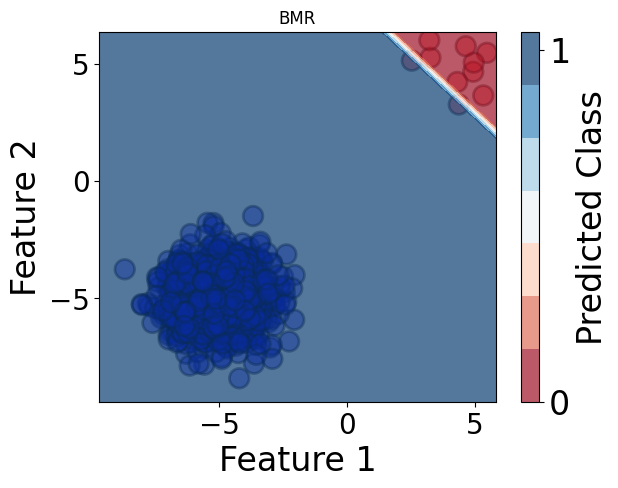

Threshold


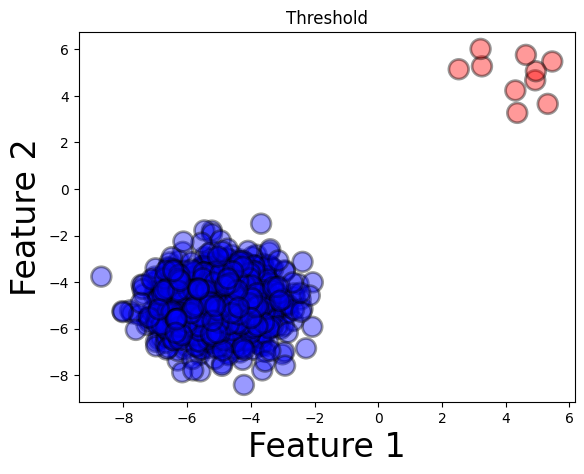

Threshold


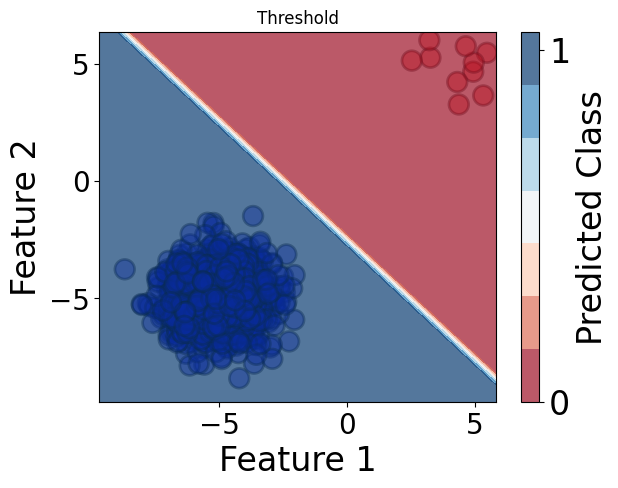

In [3]:
model = 'SVM-linear'
# model = 'SVM-rbf'
# model = 'Linear'
# model = 'MLP'

balance_clf = True
# balance_clf = False

classifiers_dict = classifier.get_classifier(
                      data_clf=data_clf,
                      model=model,
                      balance_clf=balance_clf,
                      _plot_data=True)
data_clf['clf'] = classifiers_dict['Baseline']        

## Fit deltas

Original Data


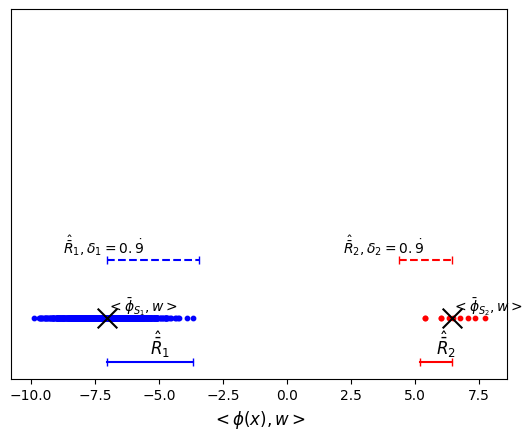

Original dataset is solvable so not downsampling, set 'force_downsample' to 'True' to try and find a lower loss via downsampling anyway
Original Data:


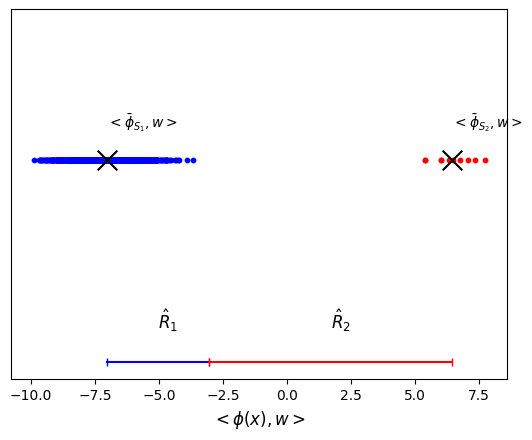

In [4]:
X = data_clf['data']['X']
y = data_clf['data']['y']
clf = data_clf['clf']
deltas_model = downsample.downsample_deltas(
    clf).fit(X, y, _print=True, _plot=True, grid_search=True)

## Plot training data information

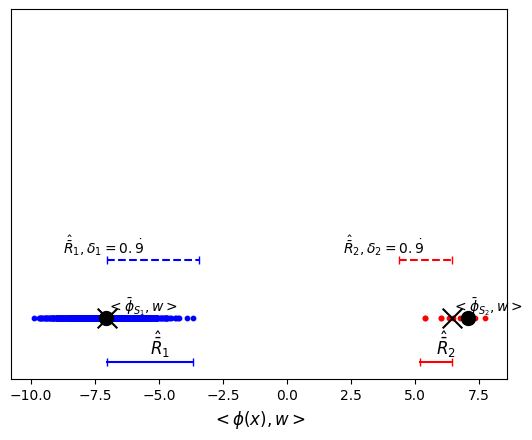

In [5]:
deltas_model.plot_data(data_clf)

## See how classifier's boudnary changes with delta

In [6]:
@ipywidgets.interact_manual(
    delta2=(0.00001, 1., 0.00001),
)
def plot(delta2=1):
    ax, _ = plots._get_axes(None)
    plots.plot_classes(data_clf['data'], ax=ax)
    def pred_func(X): return deltas_model._predict_given_delta2(X, delta2)
    plots.plot_decision_boundary_custom_pred(
        pred_func, data_clf['data'], ax=ax, probs=False)
    ax.set_title(f'delta_class0 = {delta2}')
    plots.plt.show()

interactive(children=(FloatSlider(value=1.0, description='delta2', max=1.0, min=1e-05, step=1e-05), Button(des…

## Show parameters

In [7]:
deltas_model.print_params()

Parameters
                R:  9.904027822987942
                N1: 1000
                N2: 10
                R1: 3.367915857811386
                R2: 1.267429603355497
                M:  9.071602670773512
                D:  13.499971817512856
                C1: 1
                C2: 1


# Evaluation on test data

                  Accuracy   G-Mean  ROC-AUC        F1
Method                                                
Baseline           1.00000  1.00000  1.00000  1.000000
SMOTE              1.00000  1.00000  1.00000  1.000000
Balanced Weights   1.00000  1.00000  1.00000  1.000000
BMR                0.97705  0.97678  0.97705  0.976511
Threshold          1.00000  1.00000  1.00000  1.000000
Our Method         1.00000  1.00000  1.00000  1.000000 


Baseline


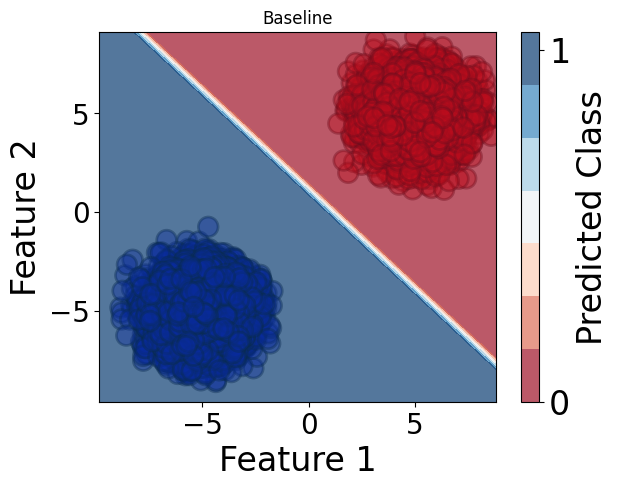

SMOTE


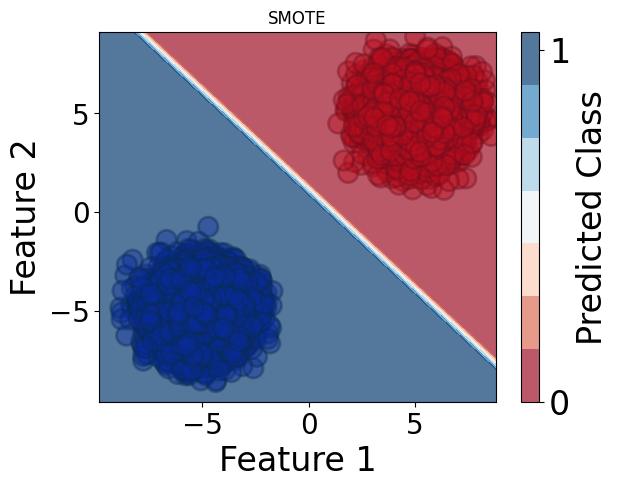

Balanced Weights


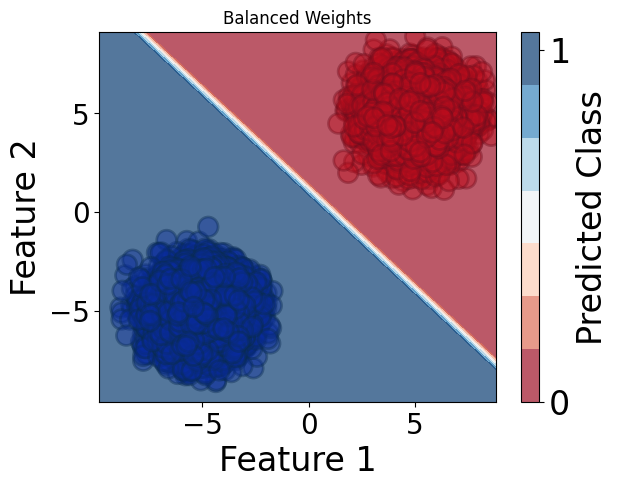

BMR


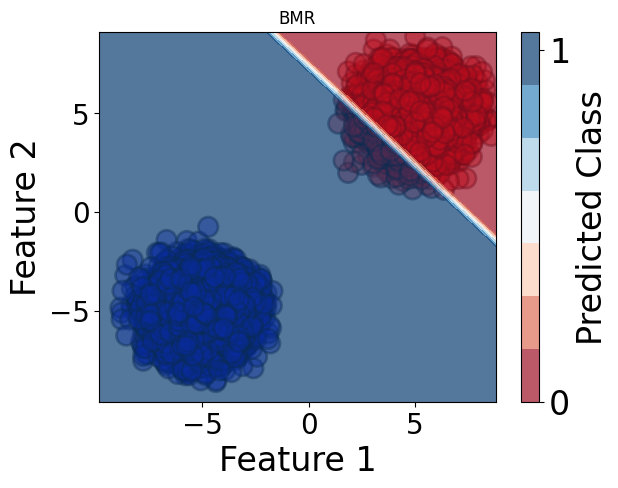

Threshold


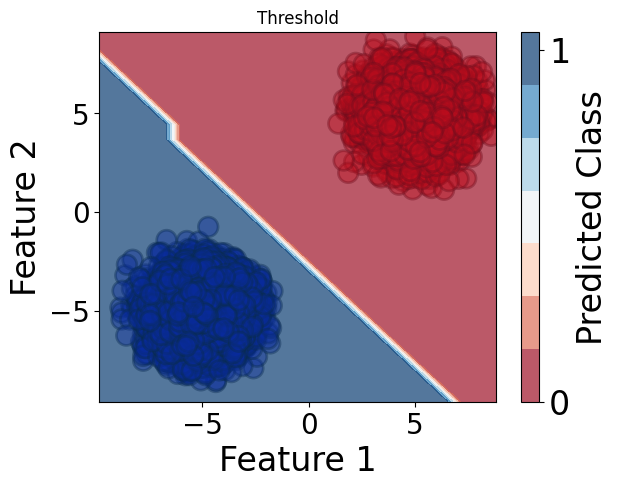

Our Method


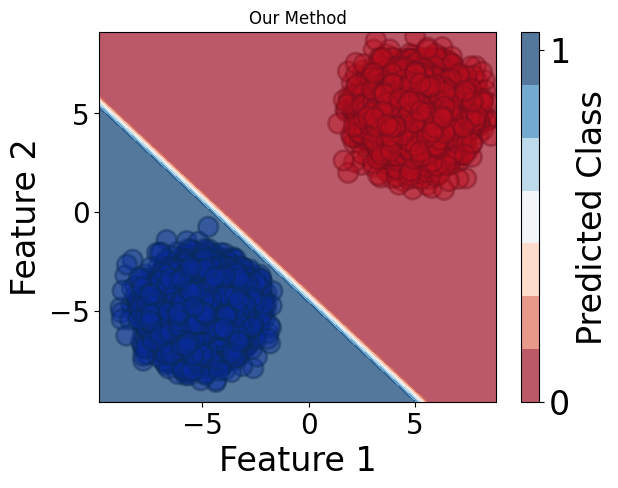

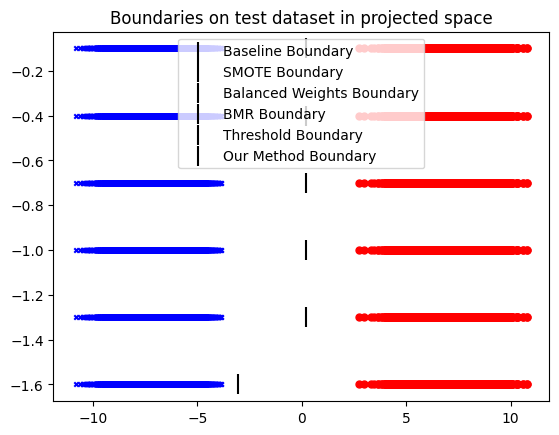

LATEX table format


\begin{tabular}{lrrrr}
 & Accuracy & G-Mean & ROC-AUC & F1 \\
Method &  &  &  &  \\
Baseline & 1.0000 & 1.0000 & 1.0000 & 1.0000 \\
SMOTE & 1.0000 & 1.0000 & 1.0000 & 1.0000 \\
Balanced Weights & 1.0000 & 1.0000 & 1.0000 & 1.0000 \\
BMR & 0.9770 & 0.9768 & 0.9770 & 0.9765 \\
Threshold & 1.0000 & 1.0000 & 1.0000 & 1.0000 \\
Our Method & 1.0000 & 1.0000 & 1.0000 & 1.0000 \\
\end{tabular}



,Accuracy,G-Mean,ROC-AUC,F1
Method,,,,
Baseline,1.00000,1.00000,1.00000,1.000000
SMOTE,1.00000,1.00000,1.00000,1.000000
Balanced Weights,1.00000,1.00000,1.00000,1.000000
BMR,0.97705,0.97678,0.97705,0.976511
Threshold,1.00000,1.00000,1.00000,1.000000
Our Method,1.00000,1.00000,1.00000,1.000000


In [8]:
classifiers_dict['Our Method'] = deltas_model
evaluation.eval_test(classifiers_dict,
                       data_clf['data_test'], _print=True, _plot=True)